# Digit Recognition 

You can create very useful clusters without having labeled data. Let's test with MNIST

0. Import usuals librairies

In [1]:
import pandas as pd
import numpy as np

1. In Scikit Learn, import _load_digits_

In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True, as_frame=True)

2. Look at the [Load_digit](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) documentation and store the numbers in a _numbers_ variable and your target variable in a _target_ variable.

In [3]:
numbers = pd.DataFrame(X)
target = pd.Series(y)

3. Tentons de visualiser quelques nombres. Regardez d’abord la taille de votre dataset. Combien de colonnes voyez vous ? 

Devinez ensuite quelle taille d’image ce nombre de colonnes devraient donner

In [4]:
datas, pixels = numbers.shape
print(f"{datas, pixels}, with image size of {pixels**(0.5)} x {pixels**(0.5)}")

(1797, 64), with image size of 8.0 x 8.0


4. Now look at the documentation related to [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) from matplotlib. Try to view a random number. Add as a caption, the number this image corresponds to. Then try to view 10 random numbers in the dataset

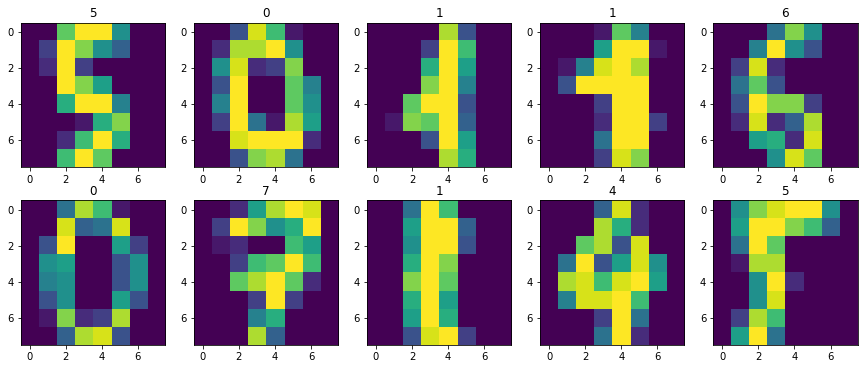

In [10]:
from matplotlib import pyplot as plt

def plot_numbers(df, target, num_sample = 10, num_cols = 5):
    
    datas, pixels = df.shape
    
    rand_samp = df.sample(n=num_sample, random_state=1)
    
    rand_sample= pd.DataFrame({"images": rand_samp.apply(lambda x: x.values.reshape(int(pixels**0.5), int(pixels**0.5)), axis=1).sort_index(), 
                               "target": target[target.index.isin(rand_samp.index)]})
    
    num_lines = int(num_sample / num_cols) + int(num_sample%num_cols != 0)
    
    f, axes = plt.subplots(num_lines, num_cols,figsize=(15,3*num_lines))

    for idx, ax in enumerate(axes.flat):
        row = rand_sample.iloc[idx, :]
        ax.imshow(row["images"])
        ax.set_title(row["target"])

    plt.show()
    
plot_numbers(numbers, target)

6. Create your KMeans algorithm with the right number of clusters

In [118]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10, init = "k-means++", random_state = 0)
clusters = kmeans.fit_predict(numbers)

7. Let's evaluate our model, calculate the _accuracy_score_ of our predictions by importing the sklearn module. What do you conclude?

In [205]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(clusters, target.values))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       166
           1       0.01      0.01      0.01       180
           2       0.01      0.02      0.01        91
           3       0.01      0.01      0.01       176
           4       0.00      0.00      0.00       242
           5       0.00      0.00      0.00       179
           6       0.00      0.00      0.00       206
           7       0.00      0.00      0.00       182
           8       0.02      0.03      0.02       149
           9       0.01      0.01      0.01       226

    accuracy                           0.01      1797
   macro avg       0.01      0.01      0.01      1797
weighted avg       0.01      0.01      0.01      1797



8. Look at the coordinates of the centroids (cf. [cluster_center_](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.cluster.KMeans.html))

In [202]:
display(kmeans.cluster_centers_)

array([[ 0.00000000e+00,  1.66533454e-16,  3.07228916e-01,
         7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
         1.50602410e-01,  5.42168675e-02,  2.60208521e-18,
         1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
         8.46385542e+00,  1.53012048e+00,  9.75903614e-01,
         2.77108434e-01,  1.30104261e-18,  6.44578313e-01,
         1.07108434e+01,  1.15602410e+01,  4.33734940e+00,
         5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
         6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
         5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
         6.21686747e+00,  1.80722892e-02,  0.00000000e+00,
         8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
         1.28132530e+01,  1.43915663e+01,  5.48192771e+00,
         0.00000000e+00,  9.63855422e-02,  6.50602410e+00,
         1.16867470e+01,  1.23433735e+01,  1.48373494e+01,
         1.07590361e+01,  1.56626506e+00,  2.08166817e-17,
         6.02409639e-02,  1.11445783e+00,  3.00000000e+0

9. Try to visualize each of the centroids and compare them with the different labels. What do you notice?

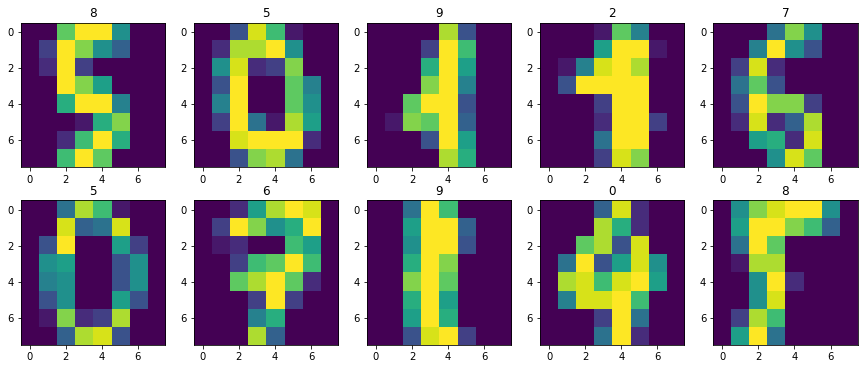

In [177]:
df_clusters = pd.Series(clusters)
plot_numbers(numbers, df_clusters)

10. We will try to match our cluster labels with the target values. Here are some clues:

    a. Identify the most frequent target value for observations in cluster 1.

In [194]:
test = pd.DataFrame({"target": target, "clusters": df_clusters})
test[test["clusters"] == 1]["target"].value_counts()

3    155
2     13
9      6
8      4
5      1
1      1
Name: target, dtype: int64

b. Programming a loop which allows to create a label vector which contains for each observation the target value corresponding to the cluster to which it belongs.

Hint : we must find the mode of each arrays corresponds to the desired cluster

You can use ```from scipy.stats import modefrom scipy.stats import mode```

In [196]:
from scipy.stats import mode

test["clusters"] = test["clusters"].apply(lambda x: mode(test[test["clusters"] == x]["target"].values).mode[0])

11. Re-evaluate your model. What is your new *accuracy_score*?

In [200]:
print(classification_report(test["clusters"], test["target"]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       179
           1       0.30      0.60      0.40        91
           2       0.84      0.84      0.84       176
           3       0.85      0.86      0.85       180
           4       0.90      0.98      0.94       166
           5       0.75      0.91      0.82       149
           6       0.98      0.97      0.98       182
           7       0.99      0.86      0.92       206
           8       0.59      0.45      0.51       226
           9       0.77      0.57      0.66       242

    accuracy                           0.80      1797
   macro avg       0.80      0.80      0.79      1797
weighted avg       0.82      0.80      0.80      1797



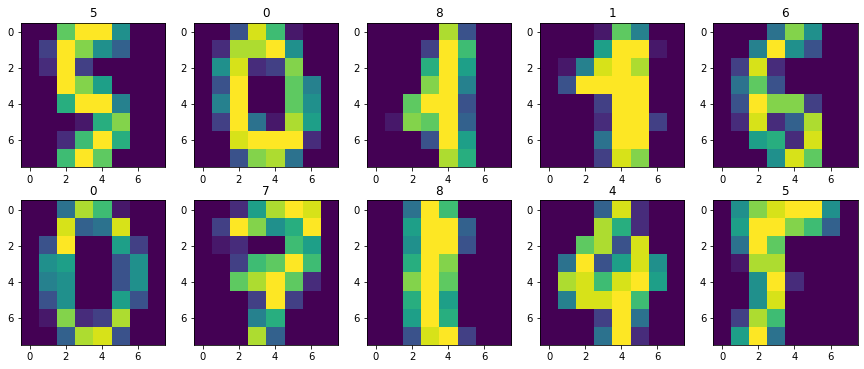

In [201]:
plot_numbers(numbers, test["clusters"])

12. Look at the numbers where our algorithm got it wrong the most via a confusion matrix...

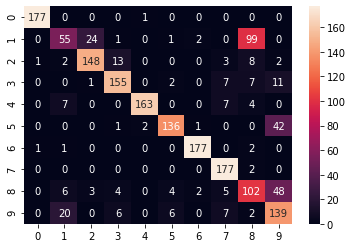

In [208]:
sns.heatmap(confusion_matrix(test["target"], test["clusters"]), annot=True, fmt="d")
plt.show()

In [235]:
kmeans = KMeans(n_clusters= 13, init = "k-means++", random_state = 0)
clusters = kmeans.fit_predict(numbers)

In [236]:
test = pd.DataFrame({"target": target, "clusters": pd.Series(clusters)})
test["clusters"] = test["clusters"].apply(lambda x: mode(test[test["clusters"] == x]["target"].values).mode[0])

In [238]:
print(classification_report(test["clusters"], test["target"]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       179
           1       0.85      0.74      0.79       208
           2       0.82      0.84      0.83       173
           3       0.85      0.92      0.88       170
           4       0.88      0.99      0.93       161
           5       0.92      0.91      0.91       184
           6       0.97      0.98      0.98       180
           7       1.00      0.84      0.91       213
           8       0.80      0.85      0.82       163
           9       0.78      0.85      0.82       166

    accuracy                           0.89      1797
   macro avg       0.89      0.89      0.89      1797
weighted avg       0.89      0.89      0.89      1797



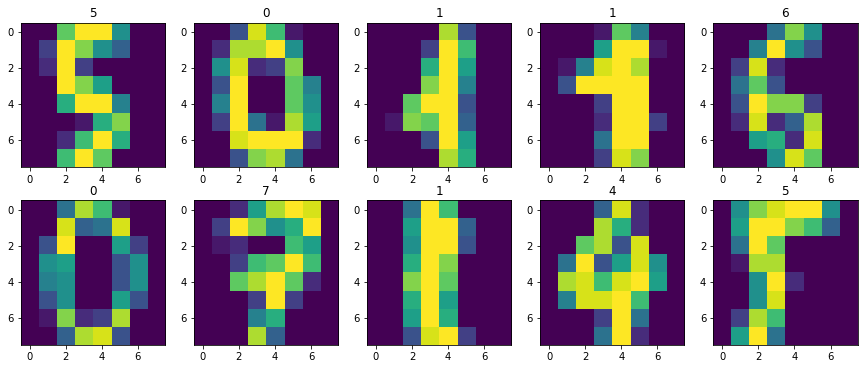

In [257]:
plot_numbers(numbers, test["clusters"])

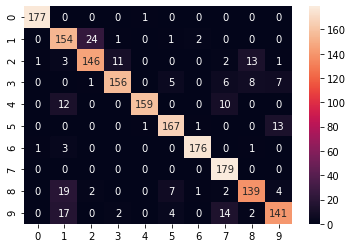

In [258]:
sns.heatmap(confusion_matrix(test["target"], test["clusters"]), annot=True, fmt="d")
plt.show()